### Task 1. October 5th, 2020: 
Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

### Solution

In [1]:
# Libraries required for this solution
import numpy as np # Efficient numeric arrays
import math # Module containing mathematical functions, including square root 
import matplotlib.pyplot as plt # Used to help create basci plots
import decimal # Module that will allow expreesion of a number as a decimal rather than a float

In python, there is a simple means of calculating the square root of a number, using the sqrt function contained in the math library in python. However, it is important to know that this calculation is only an approximation of the square root of a number, albeit a very accurate approximation for humans. This is highlighted below.

In [2]:
# To calculate the square root of 2, we can use the sqrt function contained in the math library
math.sqrt(2)

1.4142135623730951

Extenuating this, we can plot and view the sqrt() function. Below, we will plot and view the sqrt function up to the value of 10, as below, where x is taken as 1000 points between 0 and 10, linearly spaced, and y is the square root of that number.

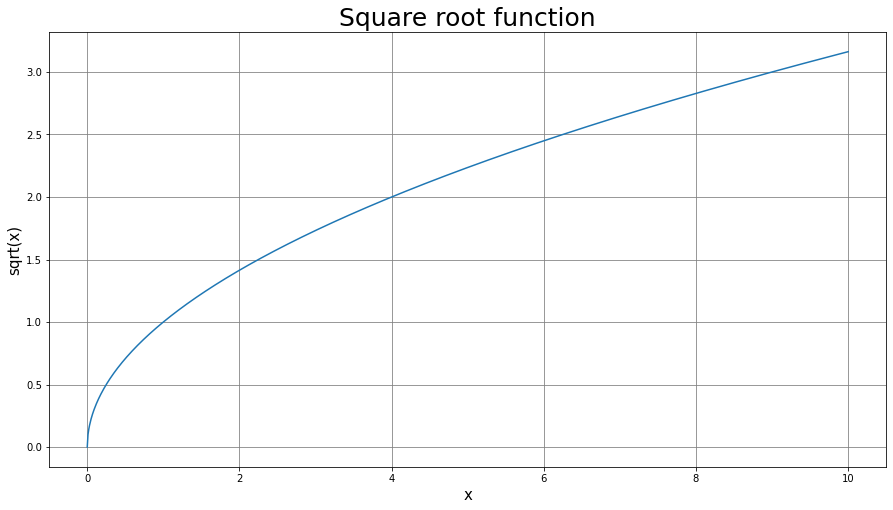

In [3]:
# Create a plot of x vs sqrt(x) from 0 to 10 with 1000 intervals
x = np.linspace(0.0, 10.0, 1000)
y = np.sqrt(x)

# Resize the output figure
plt.rcParams['figure.figsize'] = (15,8)
plt.title('Square root function', size=25)
plt.xlabel('x', size=15)
plt.ylabel('sqrt(x)', size=15)
# Show grid lines
plt.grid(b=True, which='major', color='grey', linestyle='-')

plt.plot(x,y)
plt.show()

Using the in-built sqrt() function yields a value of 1.4142135623730951 for sqrt(2). "This is a floating point representation, or aproximation, of the true value of the binary approximation stored by the machine." [2] To explain this, we must first understand that floating point numbers are represented in a computer as binary (base 2) fractions, and that these binary fractions are actually an approximation of the actual number. For example, consider an irrational number, which is a number that has an infinite number of decimal places with no repeating pattern. A computer must represent this in some way, so the binary representation of this will be an approximation of the actual number. However, us humans like to deal in decimal (base 10), and most decimal floating points cannot be exactly be exactly represented as binary fractions. As a result, the decimal number on our computer screen is actually an approximation of the binary floating point number, which in turn is an approximation of the actual number. These approximations are generally very accurate and not nociceable by the user, however they can cause error and this is something we should always be aware of in floating point arithmetic. Above, we use the sqrt() function contained in the math library. This result is an approximation of the actual number, due to the constraints explained above, a point which is proven by the below calculation.\
[2] Floating point arithmetic: https://docs.python.org/3.8/tutorial/floatingpoint.html

In [4]:
# The square of math.sqrt(2) should be 2
math.sqrt(2) * math.sqrt(2)

2.0000000000000004

This task requests that we calculate the square root of 2 using our own algorithm and not that from the standard library. Perhaps the first method for approximating the square root of a number was the Babylonian Method, also known as Heron's Method, named after the Greek Mathmetician Heron of Alexandria in AD60. [4] This method is based on the idea that if z is an overestimate to the square root of a non-negative real number x then x/z will be an underestimate, or vice versa, and so the average of these two numbers may reasonably be expected to provide a better approximation than z. Expressed in mathematical terms, the square root $z$ of a number $x$ can be approximated using the following mathematics:

$$ z_{next} = \frac{\frac{x}{z} + {z}}{2} $$

Iterating this principle will converge on a more accurate result each time.\
[4] Wikipedia: Methods of computing square roots: https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

Using this equation, python code can be written for a function to calculate the square root of a given number, making use of a while loop, as shown below. [5]. For this task, we are asked to focus on the square root of 2.\
[5] w3resource: Python Math: Computing square roots using the Babylonian method: https://www.w3resource.com/python-exercises/math/python-math-exercise-18.php

As noted above, floating point arithmetic using the float datatype has limitations with accuracy. The decimal module offers a Decimal datatype for decimal floating point arithmetic.[3] Compared to the built-in float implementation of binary floating point, using decimal is especially helpful for situations where rounding is required during calculation, or certain precision of the above approximations is required. We will employ the decimal module for our algorithm\
[3] Decimal floating point arithmetic: https://docs.python.org/3.8/tutorial/stdlib2.html#decimal-floating-point-arithmetic

In [5]:
def sqrt2():
    """
    A function to calculate the square root of the number 2 using the Babylonian Method
    """
   # Set the decimal place precision to 100
    with decimal.localcontext() as ctx:
        ctx.prec = 100
    # Make an initial estimate for the square root z
        z = decimal.Decimal(2/2.0);
    # Declare an initial value for z2, which is different to z
        z2 = z + 1;
    # Loop until z = z2. Initially starting 1 apart, the values of z and z2 in the while loop will converge towards each 
    # other
        while (z != z2):
        # Calculate a better estimate for z
            n = decimal.Decimal(2/ z);
            z2 = z;
            z = decimal.Decimal((n + z)/2);
    
    # return the better estimate for z
        return z;

In [6]:
# Call the sqrt2() function
print(sqrt2())

1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


### Testing of the function
We all know that multiplying the square root of a number by itself, we should get the number. Let's try with the above function

In [7]:
sqrt2() * sqrt2()

Decimal('2.000000000000000000000000000')

Above is a quick verifictaion of the function. Let's now compare it to the value obtained by using the function contained in the python standard library

In [8]:
math.sqrt(2) * math.sqrt(2)

2.0000000000000004

Although the two results look very close, they differ very slightly. We can see that the sqrt2() function yields a more accurate result that the in-built python math.sqrt(2), as shown when value is squared and compared to 2. 